In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sentiment_df = pd.read_csv("./sentiment140_cleaned.csv")

In [3]:
sentiment_df.head()

,target,id,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww thats bumm...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see


In [4]:
sentiment_df.shape

(1600000, 7)

In [5]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   target        1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   flag          1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
 6   cleaned_text  1599678 non-null  object
dtypes: int64(2), object(5)
memory usage: 85.4+ MB


In [6]:
sentiment_df.describe()

,target,id
count,1600000.0,1.600000e+06
mean,0.5,1.998818e+09
std,0.5,1.935761e+08
min,0.0,1.467810e+09
25%,0.0,1.956916e+09
50%,0.5,2.002102e+09
75%,1.0,2.177059e+09
max,1.0,2.329206e+09


In [7]:
sentiment_df[sentiment_df.cleaned_text.isna() == True]

,target,id,date,flag,user,text,cleaned_text
3997,0,1468720797,Tue Apr 07 03:21:48 PDT 2009,NO_QUERY,mohdnajwan,what to do,NaN
4233,0,1468771833,Tue Apr 07 03:39:06 PDT 2009,NO_QUERY,goldieloxx,just,NaN
18950,0,1556733475,Sun Apr 19 00:05:23 PDT 2009,NO_QUERY,LouiseRedknapp,up again,NaN
27140,0,1559064681,Sun Apr 19 10:09:43 PDT 2009,NO_QUERY,horriddeath,and it did,NaN
29900,0,1563617479,Sun Apr 19 23:32:19 PDT 2009,NO_QUERY,chrzrd,Its over!,NaN
...,...,...,...,...,...,...,...
1592715,1,2191790700,Tue Jun 16 05:58:39 PDT 2009,NO_QUERY,halleyji,so this it .. then,NaN
1595775,1,2192466848,Tue Jun 16 07:04:51 PDT 2009,NO_QUERY,ValeriaJsmPr,here I am,NaN
1596318,1,2192628378,Tue Jun 16 07:19:07 PDT 2009,NO_QUERY,aptextclan,is ON!!!!!!,NaN
1598921,1,2193305981,Tue Jun 16 08:16:39 PDT 2009,NO_QUERY,Jsstar0273,If only?,NaN


In [8]:
sentiment_df['cleaned_text'] = sentiment_df['cleaned_text'].fillna("").astype(str)

In [9]:
sentiment_df.target.value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [10]:
sentiment_df[sentiment_df.target == 0].head(1)

,target,id,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww thats bumm...


In [11]:
sentiment_df[sentiment_df.target == 1].head(1)

,target,id,date,flag,user,text,cleaned_text
800000,1,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,love health4uandpets u guys r best


In [12]:
# 1 -> Positive, 0 -> Negative

In [13]:
y = sentiment_df['target'].values

#### BoW - Bag of words

Uses an unordered collection (a "bag") of words

sentence - a blue dog was a cool dog

Vocab size - 8


a an the blue cat dog was cool

Op  - [2 0 0 1 0 2 0 1]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)  # limit vocab for simplicity
X_bow = vectorizer.fit_transform(sentiment_df['cleaned_text']).toarray()

In [15]:
X_bow.shape

(1600000, 1000)

In [16]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_bow, y, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
# raytune

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    verbose=1
)

Epoch 1/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.7369 - loss: 0.5250 - val_accuracy: 0.7550 - val_loss: 0.4980
Epoch 2/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - accuracy: 0.7559 - loss: 0.4976 - val_accuracy: 0.7570 - val_loss: 0.4948
Epoch 3/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - accuracy: 0.7619 - loss: 0.4905 - val_accuracy: 0.7587 - val_loss: 0.4927
Epoch 4/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 45s 1ms/step - accuracy: 0.7652 - loss: 0.4855 - val_accuracy: 0.7589 - val_loss: 0.4923
Epoch 5/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - accuracy: 0.7680 - loss: 0.4830 - val_accuracy: 0.7582 - val_loss: 0.4931
Epoch 6/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - accuracy: 0.7680 - loss: 0.4824 - val_accuracy: 0.7587 - val_loss: 0.4926
Epoch 7/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - accuracy: 0.7695 - loss: 0.4804 - val_accuracy: 0.7592 - val_loss: 0.4941
Epoch 8/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 45s 1ms/step - accuracy: 

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_acc)

0.7578499913215637


In [26]:
import joblib
model.save("ffnn_bow_model.keras")
joblib.dump(vectorizer, "bow_vectorizer.pkl")
# model = tf.keras.models.load_model("ffnn_bow_model.keras")
# vectorizer = joblib.load(vectorizer, "bow_vectorizer.pkl")

['bow_vectorizer.pkl']

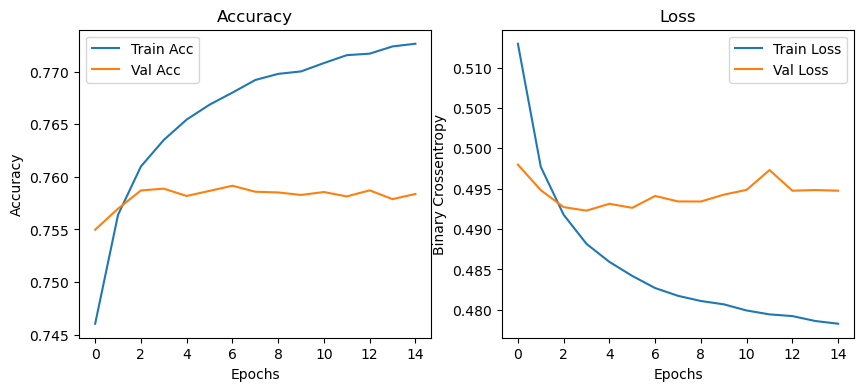

In [19]:
plt.figure(figsize=(10,4))

# Plot accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend()

plt.show()


### TF-IDF

Term Frequency – Inverse Document Frequency gives each word a weight based on:

how often it appears in a document (TF), and

how rare it is across all documents (IDF).

So, frequent but uninformative words (“the”, “is”, etc.) get down-weighted, while unique words get higher importance.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)

X = tfidf.fit_transform(sentiment_df['cleaned_text']).toarray()
y = sentiment_df['target'].values

print("TF-IDF shape:", X.shape)

TF-IDF shape: (1600000, 1000)


In [16]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    verbose=1
)


Epoch 1/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.7381 - loss: 0.5210 - val_accuracy: 0.7558 - val_loss: 0.4962
Epoch 2/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.7582 - loss: 0.4930 - val_accuracy: 0.7586 - val_loss: 0.4907
Epoch 3/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.7649 - loss: 0.4834 - val_accuracy: 0.7602 - val_loss: 0.4907
Epoch 4/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.7688 - loss: 0.4783 - val_accuracy: 0.7599 - val_loss: 0.4894
Epoch 5/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.7727 - loss: 0.4737 - val_accuracy: 0.7605 - val_loss: 0.4894
Epoch 6/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.7757 - loss: 0.4687 - val_accuracy: 0.7594 - val_loss: 0.4902
Epoch 7/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.7787 - loss: 0.4662 - val_accuracy: 0.7593 - val_loss: 0.4908
Epoch 8/15
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_acc)

0.7569125294685364


In [19]:
import joblib

# Save model
model.save("ffnn_tfidf_model.keras")

# Save vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

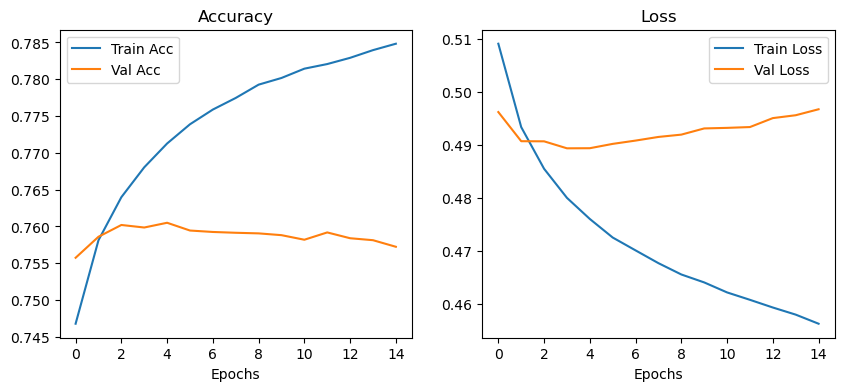

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()


### BERT


In [22]:
!pip install transformers torch --quiet

In [25]:
!pip install tf-keras

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 MB 20.6 MB/s  0:00:12 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.2 MB/s  0:00:004.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.3 MB/s  0:00:01m 5.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 37.6 MB/s  0:00:00 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.4/622.4 kB 8.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17/17 [tf-keras];237m━━ 16/17 [tf-keras]rd]ilesystem]


In [28]:
!pip install tensorflow-cpu==2.16.1
!pip install tf-keras==2.16.0 --no-dependencies

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 MB 2.0 MB/s  0:01:56 eta 0:00:010:00:04


In [38]:
!pip uninstall keras --y


Found existing installation: keras 3.11.3
Uninstalling keras-3.11.3:
  Successfully uninstalled keras-3.11.3


In [39]:
!pip install "keras<3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.7 MB/s  0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.2 requires keras>=3.0.0, but you have keras 2.15.0 which is incompatible.
tensorflow-cpu 2.16.1 requires keras>=3.0.0, but you have keras 2.15.0 which is incompatible.


In [20]:
from transformers import pipeline

In [ ]:
texts = sentiment_df['cleaned_text'].tolist()
y = sentiment_df['target'].values


embedder = pipeline(
    "feature-extraction",
    model="bert-base-uncased",
    framework="pt",  # Force PyTorch
    device=-1        # or 0 if you have a GPU
)

embeddings = embedder(texts)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Convert token embeddings → sentence embeddings (mean pooling)
X = np.array([np.mean(e, axis=0) for e in embeddings])
print("BERT sentence embeddings shape:", X.shape)  

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [ ]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=4,
    verbose=1
)


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

In [ ]:
from transformers import pipeline, BertModel, BertTokenizer
# from tensorflow.keras.models import load_model

model.save("ffnn_bert_model.keras")

embedder.model.save_pretrained("bert_model")
embedder.tokenizer.save_pretrained("bert_model")

# loaded_model = load_model("ffnn_bert_model.keras")
# tokenizer = BertTokenizer.from_pretrained("bert_model")
# bert_model = BertModel.from_pretrained("bert_model")
# loaded_embedder = pipeline("feature-extraction", model=bert_model, tokenizer=tokenizer)

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()
